# Trabalho Análise de Sentimentos
# Grupo: Harlan e Emmanoel
# Dataset Tweets

### - [Imports](#imp)
### - [Carregando os dados, primeira análise](#car)
### - [Vetorização](#vet)
### - [Teste com Naive Bayes](#nb)
### - [Teste com SVM](#svm)
### - [Deep Learning](#dl)

# Imports<a id='imp'></a>

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop, Adam, SGD


In [2]:
os.listdir('data')

['full_test.txt',
 'full_train.txt',
 'training.1600000.processed.noemoticon.csv']

# Carregando os dados<a id='car'></a>

In [3]:
cols = ['sentiment','id','date','query_string','user','text']

raw_df = pd.read_csv("data/training.1600000.processed.noemoticon.csv",
                          header=None, names=cols, encoding = "ISO-8859-1")

In [4]:
raw_df.head(15)

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
raw_df_filtered = raw_df[['sentiment', 'text']]

In [6]:
pd.set_option('max_colwidth', 200)
raw_df_filtered.head(15)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


### O dataset está equilibrado?

In [7]:
raw_df_filtered.groupby('sentiment').count()

,text
sentiment,
0,800000
4,800000


### Sim, está equilibrado, mas é bom alterar o label para 0 e 1

In [8]:
raw_df_filtered.sentiment = raw_df_filtered.sentiment.apply(lambda x: 1 if x == 4 else 0)

C:\Users\Maas\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
raw_df_filtered.groupby('sentiment').count()

,text
sentiment,
0,800000
1,800000


### O dataset e grande, vamos pegar um subconjunto aleatório (equilibrado)

In [10]:
tamanho_amostra = 100_000
#tamanho_amostra = 200_000

sample_df_0 = raw_df_filtered[raw_df_filtered.sentiment==0].sample(tamanho_amostra//2, random_state = 99)
sample_df_1 = raw_df_filtered[raw_df_filtered.sentiment==1].sample(tamanho_amostra//2, random_state = 99)
sample_df = pd.concat([sample_df_0, sample_df_1])

sample_df.groupby('sentiment').count()

,text
sentiment,
0,50000
1,50000


# Chegou a hora de vetorizar o dataset <a id="vet">

### Vamos usar o CountVectorizer

### Intuitivamente, acreditamos que palavras raras não agregam na classificação porque:
### - a raridade pode enviesar o seu significado devido à "má sorte" na amostra
### - o vocabulário fica grande demais, dificultando o treino
### - é possível que a memória não seja suficiente para tratar os dados
### - existe uma grande chance de serem "typos"

### Mas qual taxa de frequência usar?

### Vamos testar algumas taxas mínimas para ver o que acontece

In [11]:
CountVectorizer(min_df = 1).fit_transform(sample_df.text.values).shape

(100000, 97276)

### Essa amostra tem 97276 tokens. O que acontece se exigirmos a presença em 2 documentos no mínimo?

In [12]:
CountVectorizer(min_df = 2).fit_transform(sample_df.text.values).shape

(100000, 26826)

### Se o limite for 2 documentos o vocabulário já cai para 26826 tokens

### Vamos tentar achar alguma taxa que resulte em um número rasoável de tokens
### Procuramos no intervalo entre 0.01% e 0.1% 

In [13]:
min_rate = np.linspace(.0001, .001, 10)
min_rate

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])

In [14]:
def test_min(rate):
    
    r_list = []
    tokens_list = []
    
    for r in rate:
        
        r_list.append(r*100)
        
        count_vectorizer = CountVectorizer(min_df = r)
        
        token_count = count_vectorizer.fit_transform(sample_df.text.values).shape[1]
        
        tokens_list.append(token_count)
        
        print(f'min: {r*100:.2f}% tokens: {token_count}')

    plt.title('taxa x tokens')
    plt.axvline(x=0.05, color='r')
    plt.plot(r_list, tokens_list)

min: 0.01% tokens: 6560
min: 0.02% tokens: 3903
min: 0.03% tokens: 2880
min: 0.04% tokens: 2322
min: 0.05% tokens: 1952
min: 0.06% tokens: 1687
min: 0.07% tokens: 1504
min: 0.08% tokens: 1357
min: 0.09% tokens: 1232
min: 0.10% tokens: 1140


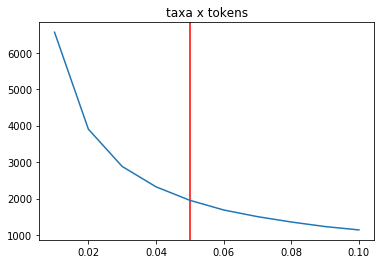

In [15]:
test_min(min_rate)

### Com uma presença mínima de 0.05% chegamos a um número interessante de tokens: 1952

In [16]:
#count_vectorizer_params = CountVectorizer(min_df = 0.0001, max_df = .05).fit_transform(sample_df.text.values)
count_vectorizer_params = CountVectorizer(min_df = 0.0005, max_df = .05).fit_transform(sample_df.text.values)

### Se exigirmos uma presença máxima em 5%, conseguimos eliminar mais alguns tokens, provavelmente, artigos, pronomes, conectivos...

### Vamos ficar com esses valores, o que resulta em 1922 tokens (bem menos que 97276)

In [17]:
print(count_vectorizer_params.shape[1])

1922


# Vamos testar o modelo Naive Bayes<a id='nb'></a>

In [18]:
X_params = count_vectorizer_params.toarray()

In [19]:
y_params = sample_df.sentiment.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_params, y_params, test_size=0.30, random_state=99)

In [21]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Apesar do número bastante inferior de tokens, não houve perda significativa na classificação

In [22]:
accuracy_score(y_test, nb.predict(X_test))

0.7531333333333333

In [23]:
target_names = ['neg', 'pos']
print(classification_report(y_test, nb.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.75      0.76      0.75     15002
         pos       0.76      0.75      0.75     14998

   micro avg       0.75      0.75      0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000



# Vamos testar com um modelo de Support Vector Machine <a id="svm">

In [24]:
svc = LinearSVC(random_state=99)

In [25]:
svc.fit(X_train, y_train)

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=99, tol=0.0001,
     verbose=0)

### Podemos dizer que houve um empate entre os modelos SVM e Naive Bayes

In [26]:
accuracy_score(y_test, svc.predict(X_test))

0.7616333333333334

In [27]:
target_names = ['neg', 'pos']
print(classification_report(y_test, svc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.78      0.73      0.75     15002
         pos       0.74      0.80      0.77     14998

   micro avg       0.76      0.76      0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000



# Deep Learning <a id="dl">

### Vamos usar outra estratégia de vetorização, mas vamos continuar com a ideia de trabalhar com ~ 2000 palavras

In [28]:
max_words = 2_000

tokenizer = Tokenizer(num_words = max_words, lower=True, split=" ")

tokenizer.fit_on_texts(sample_df.text.values)

tokens = tokenizer.texts_to_sequences(sample_df.text.values)

### Esse tokenizer resulta em um array de índices de tokens, por isso, ele tem tamanho variável

In [29]:
tokens[:5]

[[70, 4, 797, 139, 8, 47, 2, 1097],
 [671, 3, 80, 18, 37, 782, 11, 4, 143],
 [147, 75, 2, 32, 31, 12, 17, 254, 672, 18, 4, 10, 3, 12, 3, 25, 2, 32, 14],
 [144, 917, 17, 1463, 623],
 [32, 21, 154, 306, 177, 314, 1, 313, 37, 953, 1649, 1300, 35, 611, 59, 1085]]

In [30]:
len_max = 0
for i in range(len(tokens)):
    if len_max < len(tokens[i]):
        len_max = len(tokens[i])

len_max

34

### Resolvemos isso padronizando o tamanho de cada sequência de tokens, vamos usar o mesmo tamanho de nosso vocabulário, mas poderia ser outro tamanho

In [31]:
X_deep = sequence.pad_sequences(tokens, maxlen = len_max)

In [32]:
X_deep.shape

(100000, 34)

In [33]:
X_deep[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   70,    4,  797,  139,    8,   47,    2,
        1097],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  671,    3,   80,   18,   37,  782,   11,    4,
         143],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  147,   75,    2,   32,   31,   12,   17,
         254,  672,   18,    4,   10,    3,   12,    3,   25,    2,   32,
          14],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  144,  917,   17, 1463,
         623],
       [   0,    0,    0,    0,    0,    0,    0,   

In [34]:
y_params.shape

(100000,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_deep, y_params, test_size=0.30, random_state=99)

In [36]:
X_train.shape

(70000, 34)

In [37]:
X_test.shape

(30000, 34)

In [38]:
model = Sequential()

model.add(Embedding(max_words, 128, input_length=len_max))
model.add(SimpleRNN(128))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
callback_es = EarlyStopping(
    monitor="val_acc",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

checkpoint_filepath = './tmp/'



model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)



In [40]:
opt = RMSprop(
    learning_rate=0.00001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

opt2 = Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

opt3 = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)


#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#model.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           256000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 297,217
Trainable params: 297,217
Non-trainable params: 0
_________________________________________________________________


<h1 style="color:red">Treinar?</h1>

In [42]:
TRAIN = False

In [43]:
history_rnn = {}

if TRAIN:
    history_rnn = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.25,
                    callbacks=[callback_es, model_checkpoint_callback])
else:
    model.load_weights(checkpoint_filepath)

In [44]:
target_names = ['neg', 'pos']
print(classification_report(y_test, np.round(model.predict(X_test)), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.79      0.75      0.77     15002
         pos       0.76      0.80      0.78     14998

   micro avg       0.77      0.77      0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000

